Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Index(['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak',
       'slope', 'ca', 'thal', 'target', 'sex_0', 'sex_1', 'fbs_0', 'fbs_1',
       'exang_0', 'exang_1'],
      dtype='object')
k=2, 惯性: 4059.37, 轮廓系数: 0.176, CH 指数: 58.48, DB 指数: 2.167
k=3, 惯性: 3590.99, 轮廓系数: 0.164, CH 指数: 52.51, DB 指数: 1.966
k=4, 惯性: 3128.44, 轮廓系数: 0.182, CH 指数: 54.78, DB 指数: 1.720
k=5, 惯性: 2991.57, 轮廓系数: 0.158, CH 指数: 46.23, DB 指数: 1.945
k=6, 惯性: 2871.74, 轮廓系数: 0.130, CH 指数: 40.88, DB 指数: 1.935
k=7, 惯性: 2718.83, 轮廓系数: 0.156, CH 指数: 38.63, DB 指数: 1.860
k=8, 惯性: 2609.43, 轮廓系数: 0.158, CH 指数: 36.15, DB 指数: 2.053
k=9, 惯性: 2522.74, 轮廓系数: 0.158, CH 指数: 33.87, DB 指数: 1.882
k=10, 惯性: 2477.22, 轮廓系数: 0.158, CH 指数: 31.16, DB 指数:

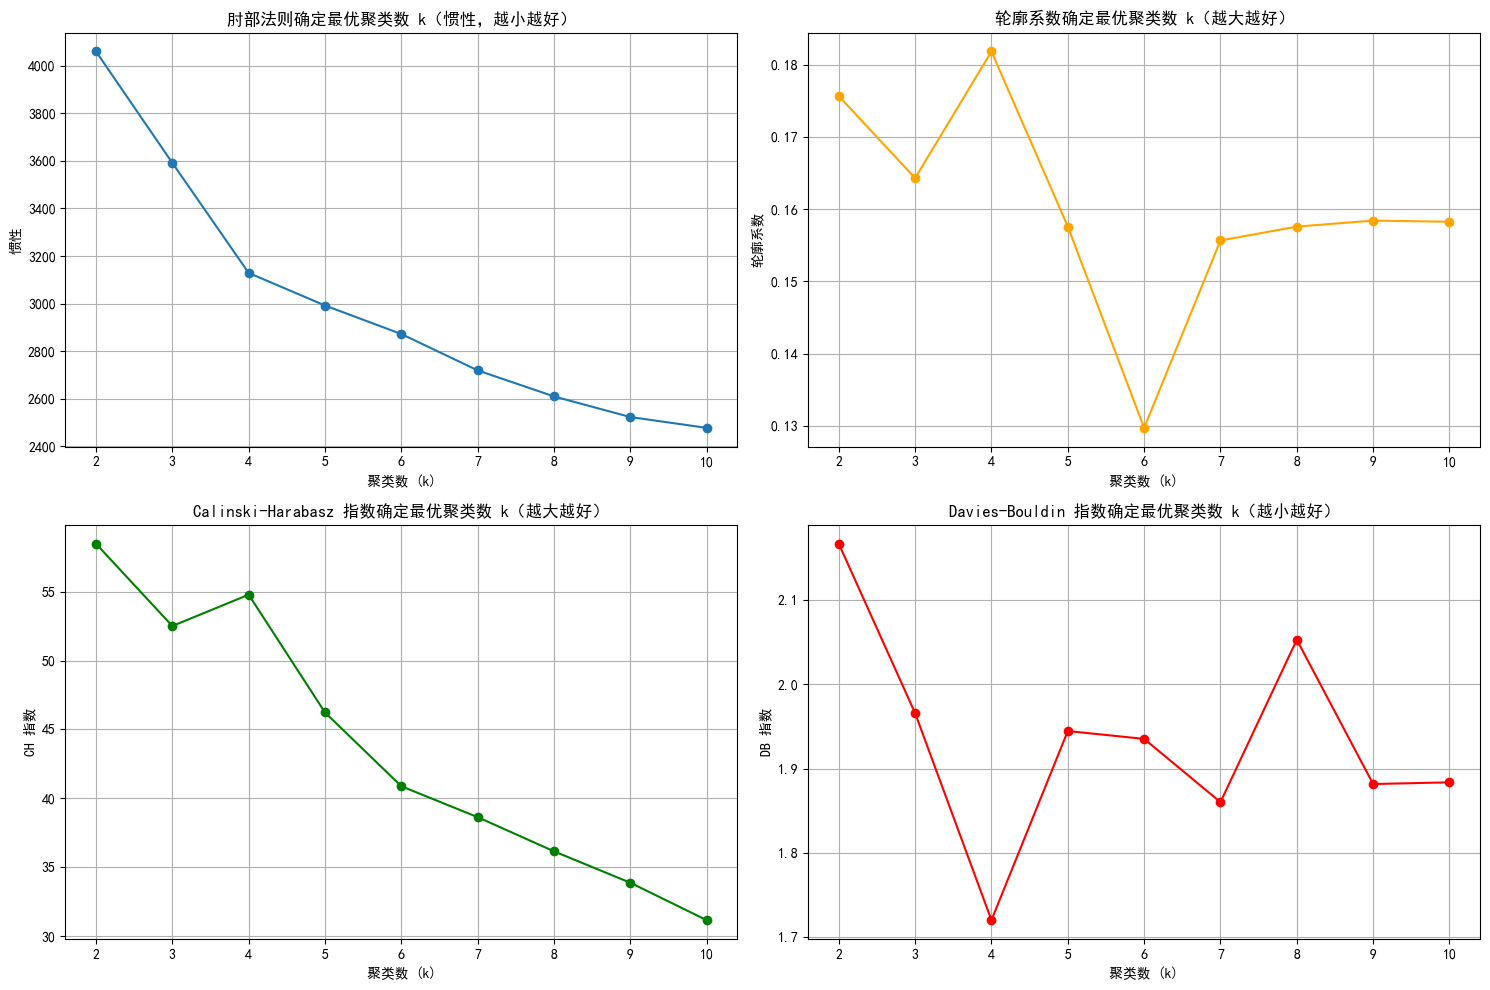

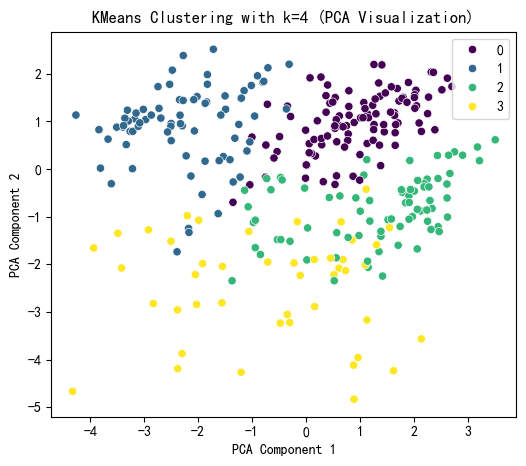

KMeans Cluster labels (k=4) added to X:
KMeans_Cluster
0                 105
2                  77
1                  76
3                  45
Name: count, dtype: int64
Index(['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak',
       'slope', 'ca', 'thal', 'sex_0', 'sex_1', 'fbs_0', 'fbs_1', 'exang_0',
       'exang_1', 'KMeans_Cluster'],
      dtype='object')
RandomForestClassifier(random_state=42)


(303, 16, 4)
--- 1. SHAP 特征重要性条形图 ---


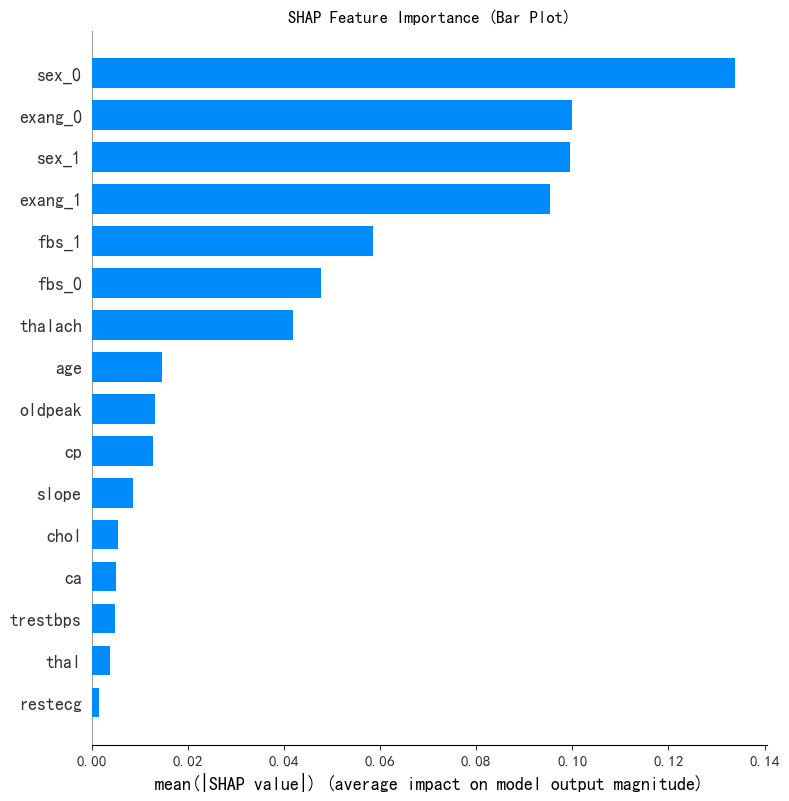

sex_0 的唯一值数量: 2
sex_0 可能是离散型变量
exang_0 的唯一值数量: 2
exang_0 可能是离散型变量
sex_1 的唯一值数量: 2
sex_1 可能是离散型变量
exang_1 的唯一值数量: 2
exang_1 可能是离散型变量
fbs_1 的唯一值数量: 2
fbs_1 可能是离散型变量
fbs_0 的唯一值数量: 2
fbs_0 可能是离散型变量


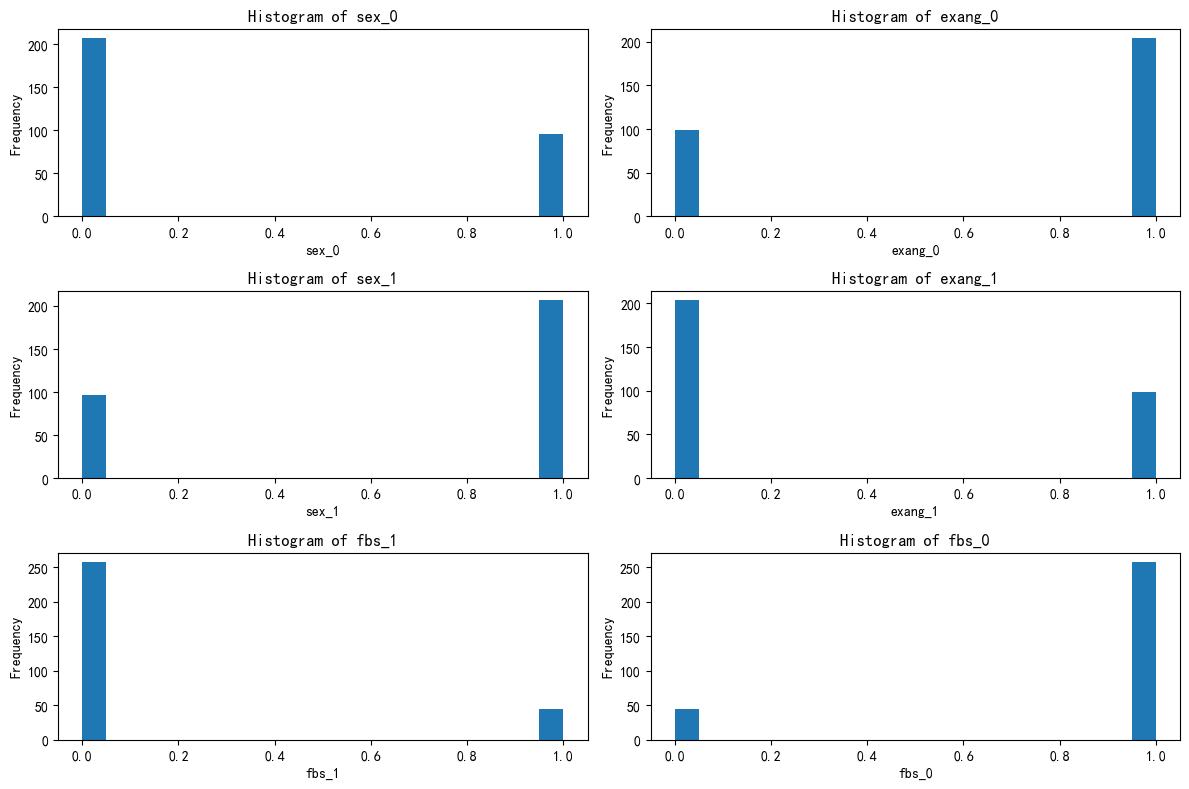

KMeans_Cluster
0                 105
2                  77
1                  76
3                  45
Name: count, dtype: int64


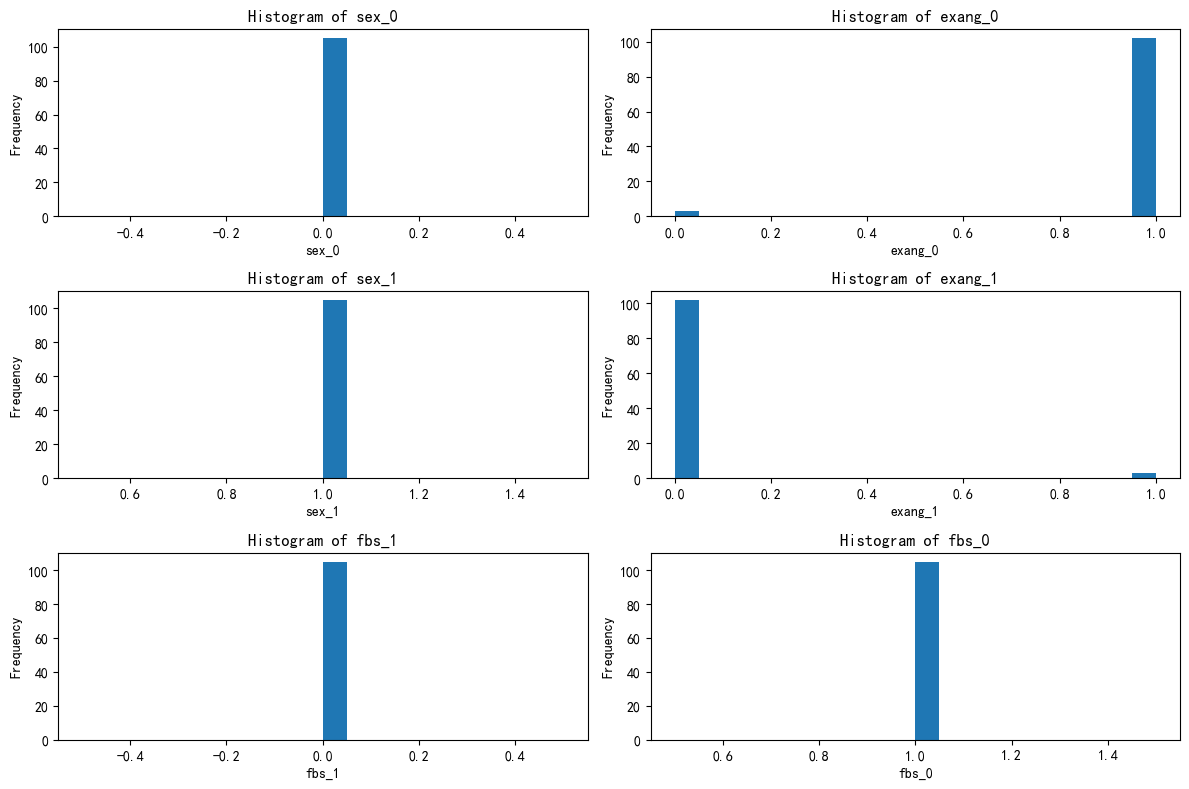

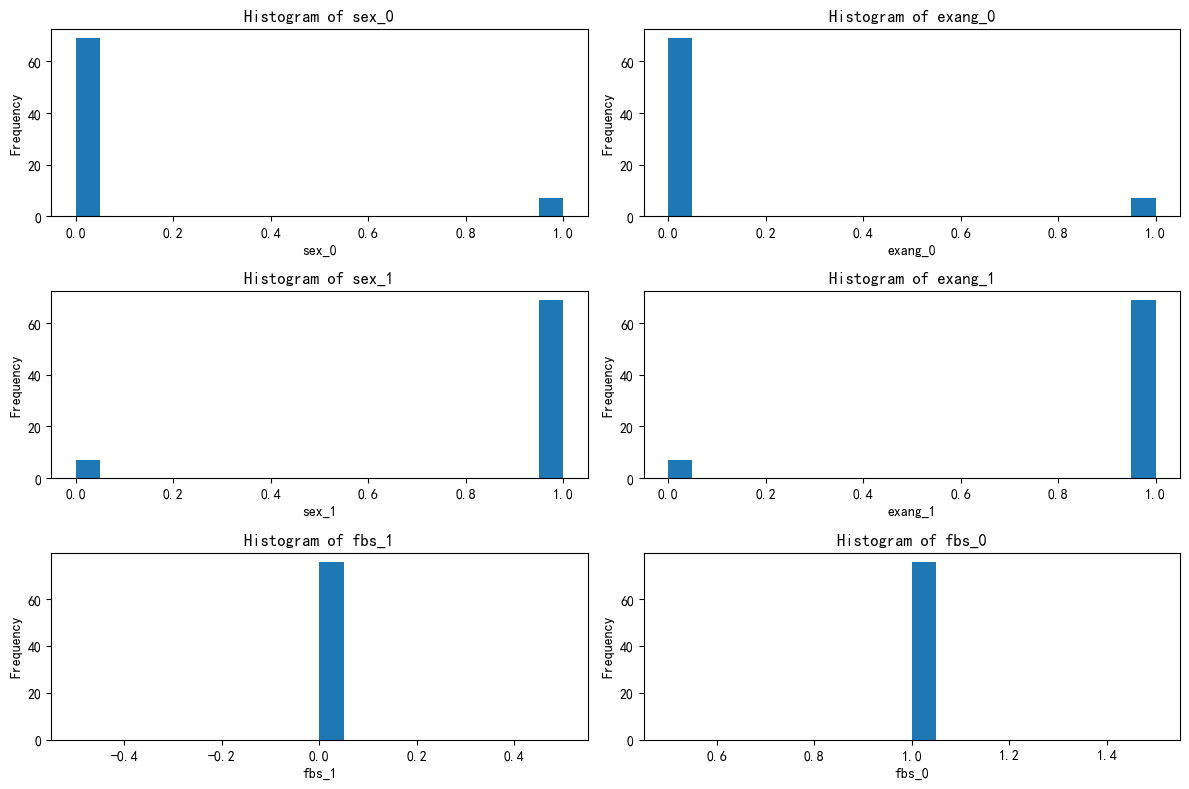

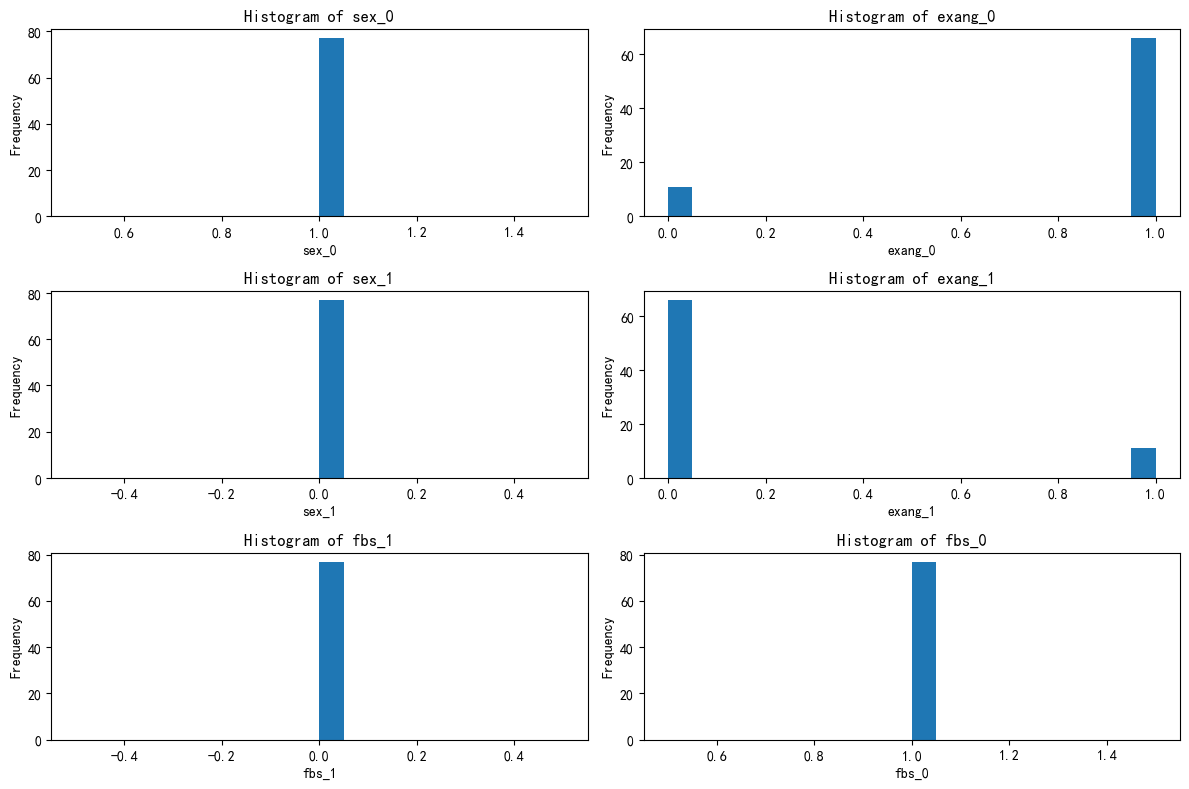

In [2]:
import pandas as pd
import pandas as pd    #用于数据处理和分析，可处理表格数据。
import numpy as np     #用于数值计算，提供了高效的数组操作。
import matplotlib.pyplot as plt    #用于绘制各种类型的图表
import seaborn as sns   #基于matplotlib的高级绘图库，能绘制更美观的统计图形。
import warnings
warnings.filterwarnings("ignore")
 
 # 设置中文字体（解决中文显示问题）
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows系统常用黑体字体
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号
data = pd.read_csv('heart.csv')    #读取数据
print(data.columns)    #'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
# 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
#提取连续特征值
continuous_features = ['age','trestbps', 'chol', 'thalach','oldpeak']
print(continuous_features)    #打印出连续特征值的列名
#提取离散特征值
discrete_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal','target']
print(discrete_features)    #打印出离散特征值的列名

#使用映射字典进行转换
mapping_dict = {
    'cp':{0:0,1:1,2:2,3:3},
    'restecg':{0:0,1:1,2:2},
    'slope':{0:0,1:1,2:2},
    'thal':{0:0,1:1,2:2,3:3},
    'ca':{0:0,1:1,2:2,3:3,4:4}
}
for feature, mapping_dict in mapping_dict.items():    #遍历映射字典
    data[feature] = data[feature].map(mapping_dict)    #将映射字典中的值替换为原数据中的值

#对离散特征值进行独热编码
data = pd.get_dummies(data, columns=['sex', 'fbs','exang'])    #对离散特征值进行独热编码
print(data.columns)    #打印出数据的列名
data2 = pd.read_csv("heart.csv")    #读取数据
list_final = []    #新建一个空列表，用于存放独热编码后新增的特征名
for i in data.columns:    #遍历数据的列名
    if i not in data2.columns:    #如果列名不在原数据的列名中
        list_final.append(i)    #将列名添加到列表中
for i in list_final:    #遍历列表中的列名
    data[i] = data[i].astype(int)    #将列名转换为int类型
#划分训练集和测试集
from sklearn.model_selection import train_test_split    #导入train_test_split函数
X = data.drop(['target'], axis=1)    #特征，axis=1表示按列删除
y = data['target']    #标签
# #按照8:2划分训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    #80%训练集，20%测试集
# print(X_train.shape)    #打印出训练集的形状
# print(X_test.shape)    #打印出测试集的形状

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# 便准化数据（聚类前通常需要标准化）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k_range = range(2, 11)  # 尝试不同的簇数
inertia_scores = []  # 存储每个簇数对应的轮廓系数
silhouette_scores = []
ch_scores = []
db_scores = []

# 尝试不同的簇数
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)  # 初始化KMeans模型
    kmeans_labels = kmeans.fit_predict(X_scaled)
    inertia_scores.append(kmeans.inertia_)  # 计算轮廓系数
    silhouette = silhouette_score(X_scaled, kmeans_labels)  # 轮廓系数
    silhouette_scores.append(silhouette)
    ch = calinski_harabasz_score(X_scaled, kmeans_labels)  # CH 指数
    ch_scores.append(ch)
    db = davies_bouldin_score(X_scaled, kmeans_labels)  # DB 指数
    db_scores.append(db)
    print(f"k={k}, 惯性: {kmeans.inertia_:.2f}, 轮廓系数: {silhouette:.3f}, CH 指数: {ch:.2f}, DB 指数: {db:.3f}")

plt.figure(figsize=(15, 10))

# 肘部法则图（Inertia）
plt.subplot(2, 2, 1)
plt.plot(k_range, inertia_scores, marker='o')
plt.title('肘部法则确定最优聚类数 k（惯性，越小越好）')
plt.xlabel('聚类数 (k)')
plt.ylabel('惯性')
plt.grid(True)

# 轮廓系数图
plt.subplot(2, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title('轮廓系数确定最优聚类数 k（越大越好）')
plt.xlabel('聚类数 (k)')
plt.ylabel('轮廓系数')
plt.grid(True)

# CH 指数图
plt.subplot(2, 2, 3)
plt.plot(k_range, ch_scores, marker='o', color='green')
plt.title('Calinski-Harabasz 指数确定最优聚类数 k（越大越好）')
plt.xlabel('聚类数 (k)')
plt.ylabel('CH 指数')
plt.grid(True)

# DB 指数图
plt.subplot(2, 2, 4)
plt.plot(k_range, db_scores, marker='o', color='red')
plt.title('Davies-Bouldin 指数确定最优聚类数 k（越小越好）')
plt.xlabel('聚类数 (k)')
plt.ylabel('DB 指数')
plt.grid(True)

plt.tight_layout()
plt.show()

# 提示用户选择 k 值
selected_k = 4

# 使用选择的 k 值进行 KMeans 聚类
kmeans = KMeans(n_clusters=selected_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
X['KMeans_Cluster'] = kmeans_labels

# 使用 PCA 降维到 2D 进行可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans 聚类结果可视化
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title(f'KMeans Clustering with k={selected_k} (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# 打印 KMeans 聚类标签的前几行
print(f"KMeans Cluster labels (k={selected_k}) added to X:")
print(X[['KMeans_Cluster']].value_counts())

"""
现在需要给这个簇赋予实际的含义，一般当你赋予实际含义的时候，你需要根据某几个特征来赋予，但是源数据特征很多，如何选择特征呢？有2种思路：

1. 你最开始聚类的时候，就选择了你想最后用来确定簇含义的特征，那么你需要选择一些特征来进行聚类，那么你最后确定簇含义的特征就是这几个特征，而非全部。如你想聚类消费者购买习惯，那么他过去的消费记录、购买记录、购买金额等等，这些特征都与消费者购买习惯有关，你可以使用这些特征来确定簇含义，一些其他的特征，如消费者年龄，工作行业则不考虑。----适用于你本身就有构造某些明确含义的特征的情况。

2. 最开始用全部特征来聚类，把其余特征作为 x，聚类得到的簇类别作为标签构建监督模型，进而根据重要性筛选特征，来确定要根据哪些特征赋予含义。---使用于你想构造什么，目前还不清楚。

***【上面这个思路好好学，这是真干货，构造具有价值的特征工程，妥妥的创新点和工作量】***

"""

print(X.columns)    #打印出数据的列名

x1= X.drop('KMeans_Cluster',axis=1) # 删除聚类标签列
y1 = X['KMeans_Cluster']
# 构建随机森林，用shap重要性来筛选重要性
import shap
import numpy as np
from sklearn.ensemble import RandomForestClassifier  # 随机森林分类器
model = RandomForestClassifier(n_estimators=100, random_state=42)  # 随机森林模型
print(model.fit(x1, y1)) # 训练模型,此时无需在意准确率 直接全部数据用来训练了

shap.initjs()
# 初始化 SHAP 解释器
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x1) # 这个计算耗时
print(shap_values.shape) # 第一维是样本数，第二维是特征数，第三维是类别数

# --- 1. SHAP 特征重要性条形图 (Summary Plot - Bar) ---
print("--- 1. SHAP 特征重要性条形图 ---")
shap.summary_plot(shap_values[:, :, 0], x1, plot_type="bar",show=False)  #  这里的show=False表示不直接显示图形,这样可以继续用plt来修改元素，不然就直接输出了
plt.title("SHAP Feature Importance (Bar Plot)")
plt.show()


import pandas as pd
selected_features = ['sex_0', 'exang_0',
                     'sex_1', 'exang_1','fbs_1','fbs_0']

for feature in selected_features:
    unique_count = X[feature].nunique() # 唯一值指的是在某一列或某个特征中，不重复出现的值
    # 连续型变量通常有很多唯一值，而离散型变量的唯一值较少
    print(f'{feature} 的唯一值数量: {unique_count}')
    if unique_count < 10:  # 这里 10 是一个经验阈值，可以根据实际情况调整
        print(f'{feature} 可能是离散型变量')
    else:
        print(f'{feature} 可能是连续型变量')

# X["Purpose_debt consolidation"].value_counts() # 统计每个唯一值的出现次数
import matplotlib.pyplot as plt

# 总样本中的前四个重要性的特征分布图
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    axes[i].hist(X[feature], bins=20)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 绘制出每个簇对应的这四个特征的分布图
print(X[['KMeans_Cluster']].value_counts())

# 提取每个簇的数据
X_cluster0 = X[X['KMeans_Cluster'] == 0] # 簇0
X_cluster1 = X[X['KMeans_Cluster'] == 1] # 簇1
X_cluster2 = X[X['KMeans_Cluster'] == 2] # 簇2

# 先绘制簇0的分布图

import matplotlib.pyplot as plt

# 总样本中的前6个重要性的特征分布图
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    axes[i].hist(X_cluster0[feature], bins=20)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 先绘制簇1的分布图

import matplotlib.pyplot as plt

# 总样本中的前四个重要性的特征分布图
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    axes[i].hist(X_cluster1[feature], bins=20)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 先绘制簇2的分布图

import matplotlib.pyplot as plt

# 总样本中的前四个重要性的特征分布图
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    axes[i].hist(X_cluster2[feature], bins=20)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



簇的总结与定义
簇 1
特征：变量值集中在较小数值区域。像 sex_0 在接近 0 处高频出现，exang_0 在接近 0 处也有高频率 ，fbs_0 在接近 1.0 处高频分布（这里数值接近反映分布特征）。说明该簇数据在这些变量上具有数值较小端集中的共性。
定义：可定义为具有较小特征值属性的样本集合，可能代表一类具有初始、基础或低水平特征的对象。
簇 2
特征：变量分布在中间数值区域，且有一定分散性。如 sex_1、exang_1 等变量在相应数值区间有一定分布，不像簇 1 那样集中在小值端。表明该簇数据在特征上具有一定过渡性或混合性。
定义：可视为具有中等特征值属性的样本集合，可能代表处于中间状态、具有混合特征的对象。
簇 3
特征：变量值集中在较大数值区域。如 exang_0 在接近 1.0 处高频出现（与簇 1 相对），说明该簇数据在对应变量上具有较大值集中的特性。
定义：定义为具有较大特征值属性的样本集合 ，可能代表具有高级、成熟或高水平特征的对象。